# Lab 3 — clustering

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline
plt.style.use("ggplot")

# Exercise 3.12

In [3]:
# 1. Loading tag-embedding_.pickle
# The embedding file created at the end of Exercise 3.2 was successfully loaded using pickle
# The data was converted into a numpy array of tag coordinates for clustering

with open("tag_embeddings.pkl", "rb") as f:
    tag_coords = pickle.load(f)
    
tags = list(tag_coords.keys())
X = np.array([tag_coords[tag] for tag in tags])

In [4]:
# Project to 2D via PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
X2 = pca.fit_transform(X)

In [18]:
# 2. Performing k-means clustering
# KMeans clustering was applied to the tag embeddings using scikit-learn just like the instruction recommended to do
# We experimented with different values of k in {2, 3, 4, 5}. We chose k=3 first without any particular reason. We also added codes for k=2, k=4, k=5
# The resulting cluster labels were extracted from the model

from sklearn.cluster import KMeans

k = 3 
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

In [19]:
# 3. Visualization using Bokeh

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

palette = Category10[10]  # up to 10 distinct colors
colors = [palette[label] for label in labels]

source = ColumnDataSource(data=dict(
    pc1     = X2[:, 0],
    pc2     = X2[:, 1],
    tag     = tags,
    cluster = [str(lbl) for lbl in labels],
    color   = colors
))

# Then create interactive scatter plot
p = figure(
    title=f"K-means clustering of tags (k={k})",
    x_axis_label="PC1",
    y_axis_label="PC2",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save"
)
p.circle(
    'pc1', 'pc2', size=8, color='color',
    legend_field='cluster', source=source
)

# configure hover to show tag name and cluster
hover = p.select_one(HoverTool)
hover.tooltips = [
    ("Tag",     "@tag"),
    ("Cluster", "@cluster")
]

p.legend.title = "Cluster"
p.legend.click_policy = "hide"  # gotta click legend to hide/show clusters

# display the plot
show(p)

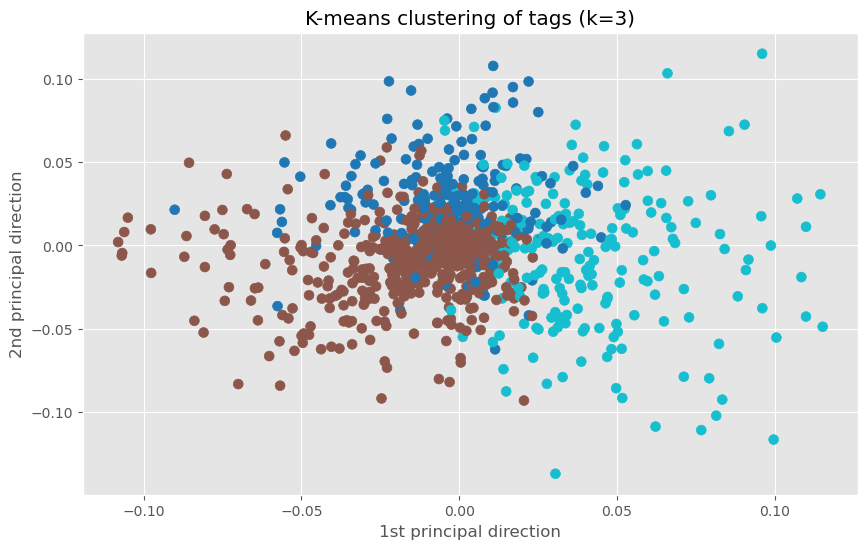

[0.22077234 0.22077234]


In [21]:
# Visualization using matplotlib (This was just an optional part)
# The clustering results were visualized in 2D using matplotlib
# The first and second principal directions were used for plottin
# Clusters appear to be well-separated, especially along the first principal direction

plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="tab10", s=50)
plt.title(f"K-means clustering of tags (k={3})")
plt.xlabel("1st principal direction")
plt.ylabel("2nd principal direction")
plt.show()

print(pca.explained_variance_ratio_)


In [13]:
# 4. Displaying cluster contents
# Tags were grouped according to the assigned cluster labels
# Each cluster contains semantically coherent tags (like time periods, themes, genres)

from collections import defaultdict

cluster_dict = defaultdict(list)
for tag, label in zip(tags, labels):
    cluster_dict[label].append(tag)

for cluster_id, tag_list in cluster_dict.items():
    print(f"\nCluster {cluster_id} ({len(tag_list)} tags):")
    print(", ".join(tag_list[:10]), "...")



Cluster 1 (601 tags):
007, 007 (series), 18th century, 1920s, 1930s, 1950s, 1960s, 1970s, 19th century, 9/11 ...

Cluster 3 (121 tags):
1980s, 80s, absurd, addiction, adolescence, alter ego, awesome soundtrack, beer, black comedy, buddy movie ...

Cluster 0 (178 tags):
3d, 70mm, action, action packed, adapted from:comic, adventure, alien, alien invasion, aliens, alone in the world ...

Cluster 2 (113 tags):
affectionate, allegory, amazing cinematography, art, art house, artist, artistic, artsy, atmospheric, beautiful ...

Cluster 4 (115 tags):
anti-hero, assassin, assassination, assassins, bad ending, betrayal, blood, bloody, brutal, brutality ...


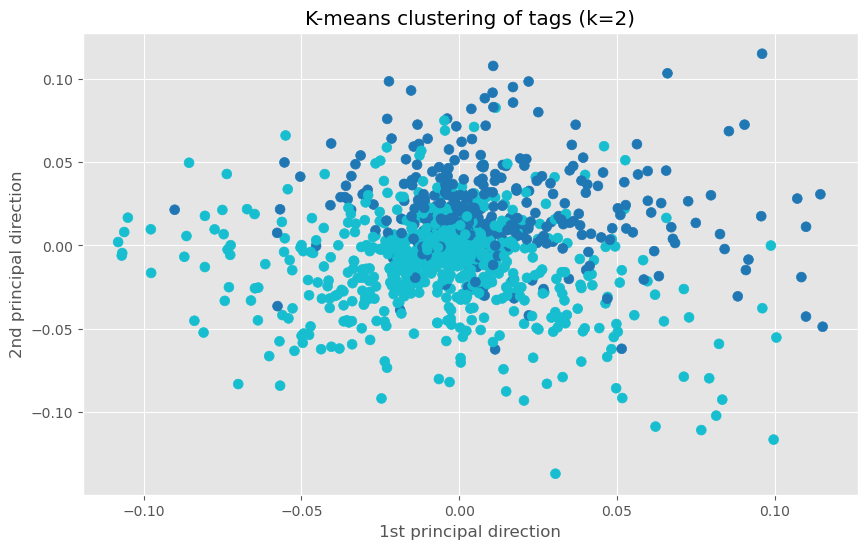


Cluster 1 (781 tags):
007, 007 (series), 18th century, 1920s, 1930s, 1950s, 1960s, 1970s, 19th century, 70mm ...

Cluster 0 (347 tags):
1980s, 3d, 80s, absurd, action, action packed, adapted from:comic, adapted from:game, adventure, alien ...
[0.22077234 0.22077234]


In [22]:
# For k=2 : (just used matplotlib for k=2,4,5 these codes were not asked but just for us)
from sklearn.cluster import KMeans
from collections import defaultdict

k = 2 
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="tab10", s=50)
plt.title(f"K-means clustering of tags (k={k})")
plt.xlabel("1st principal direction")
plt.ylabel("2nd principal direction")
plt.show()

cluster_dict = defaultdict(list)
for tag, label in zip(tags, labels):
    cluster_dict[label].append(tag)

for cluster_id, tag_list in cluster_dict.items():
    print(f"\nCluster {cluster_id} ({len(tag_list)} tags):")
    print(", ".join(tag_list[:10]), "...")

print(pca.explained_variance_ratio_)


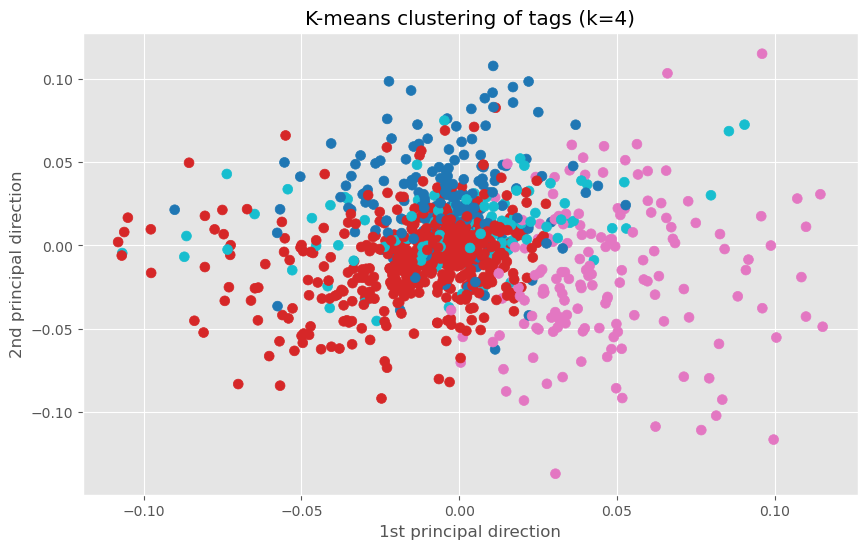


Cluster 1 (652 tags):
007, 007 (series), 18th century, 1920s, 1930s, 1950s, 1960s, 1970s, 19th century, 9/11 ...

Cluster 3 (128 tags):
1980s, 80s, absurd, addiction, adolescence, affectionate, alter ego, awesome soundtrack, beer, bittersweet ...

Cluster 0 (189 tags):
3d, 70mm, action, action packed, adapted from:comic, adventure, alien, alien invasion, aliens, allegory ...

Cluster 2 (159 tags):
anti-hero, art house, assassin, assassination, atmospheric, bad ending, biting, bizarre, bleak, blood ...
[0.22077234 0.22077234]


In [23]:
# For k=4 :
from sklearn.cluster import KMeans
from collections import defaultdict

k = 4 
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="tab10", s=50)
plt.title(f"K-means clustering of tags (k={k})")
plt.xlabel("1st principal direction")
plt.ylabel("2nd principal direction")
plt.show()

cluster_dict = defaultdict(list)
for tag, label in zip(tags, labels):
    cluster_dict[label].append(tag)

for cluster_id, tag_list in cluster_dict.items():
    print(f"\nCluster {cluster_id} ({len(tag_list)} tags):")
    print(", ".join(tag_list[:10]), "...")

print(pca.explained_variance_ratio_)


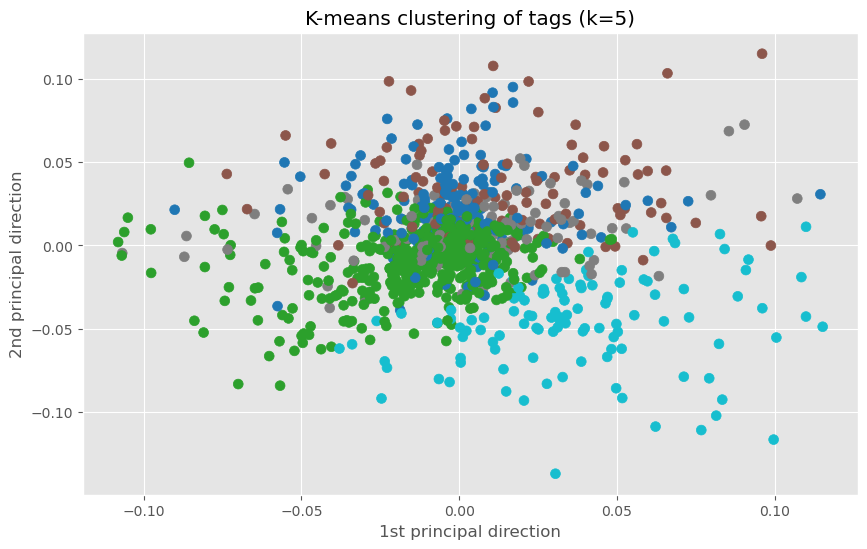


Cluster 1 (601 tags):
007, 007 (series), 18th century, 1920s, 1930s, 1950s, 1960s, 1970s, 19th century, 9/11 ...

Cluster 3 (121 tags):
1980s, 80s, absurd, addiction, adolescence, alter ego, awesome soundtrack, beer, black comedy, buddy movie ...

Cluster 0 (178 tags):
3d, 70mm, action, action packed, adapted from:comic, adventure, alien, alien invasion, aliens, alone in the world ...

Cluster 2 (113 tags):
affectionate, allegory, amazing cinematography, art, art house, artist, artistic, artsy, atmospheric, beautiful ...

Cluster 4 (115 tags):
anti-hero, assassin, assassination, assassins, bad ending, betrayal, blood, bloody, brutal, brutality ...
[0.22077234 0.22077234]


In [24]:
# For k=5 :
from sklearn.cluster import KMeans
from collections import defaultdict

k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="tab10", s=50)
plt.title(f"K-means clustering of tags (k={k})")
plt.xlabel("1st principal direction")
plt.ylabel("2nd principal direction")
plt.show()

cluster_dict = defaultdict(list)
for tag, label in zip(tags, labels):
    cluster_dict[label].append(tag)

for cluster_id, tag_list in cluster_dict.items():
    print(f"\nCluster {cluster_id} ({len(tag_list)} tags):")
    print(", ".join(tag_list[:10]), "...")

print(pca.explained_variance_ratio_)


###  Which principal directions separate the clusters well?
=> We applied K-means clustering (k = 2, 3, 4, 5) to the 5-dimensional tag embeddings and then projected to 2D via PCA.
The two PCA axes each explain about 22 % of the variance in the embedding (i.e. explained_variance_ratio_ gives [0.22, 0.22]), so neither axis is overwhelmingly dominant.
As a result, clusters are roughly equally spread along both PC1 and PC2.

In other words, both principal directions are important: PC1 and PC2 together reveal the tag clusters, with neither axis alone fully accounting for their separation.

# Exercise 3.13

In [25]:
import pwd, os, sys
from pyspark.sql import SparkSession
from random import randrange

# Initialize SparkSession with cluster settings
spark = SparkSession\
    .builder\
    .appName(pwd.getpwuid(os.getuid()).pw_name)\
    .master('yarn')\
    .config('spark.ui.port', randrange(4040, 4440, 5)) \
    .config("spark.executorEnv.PYTHONPATH", ":".join(sys.path)) \
    .getOrCreate()

sc = spark.sparkContext


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/08 11:34:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/08 11:35:00 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [26]:
import json
# Load lines from movies.txt (JSON format)
lines = sc.textFile("ix-data/ml-20m/movies.txt")

# Parse each JSON line to get movieId and genres as a set
def parse_movie_json(line):
    obj = json.loads(line)
    return (obj["movieId"], set(obj["genres"]))

# Build movieId -> genre_set dictionary
movie_genres = dict(lines.map(parse_movie_json).collect())


In [27]:
import pickle

# Load the list of most-rated movie IDs (or tuples) from the pickle file
with open("most-rated.pickle", "rb") as f:
    movie_ids = pickle.load(f)

# If entries are stored as (movieId, title) tuples, extract only the IDs
if isinstance(movie_ids[0], tuple):  # like for example (296, 'Pulp Fiction (1994)')
    movie_ids = [mid for mid, _ in movie_ids]


In [28]:
def jaccard_distance(set1, set2):
    """
    Compute the Jaccard-based distance between two genre sets.
    Distance = 1 - (size of intersection / size of union).
    """
    return 1 - len(set1 & set2) / len(set1 | set2)


In [29]:
import random

def k_medoids(movie_ids, movie_genres, k=2, max_iter=10):
    # Initialize : choose k random medoids
    medoids = random.sample(movie_ids, k)

    for _ in range(max_iter):
        clusters = {i: [] for i in range(k)}

        # Assignment step
        for mid in movie_ids:
            distances = [jaccard_distance(movie_genres[mid], movie_genres[m]) for m in medoids]
            closest = distances.index(min(distances))
            clusters[closest].append(mid)

        # Update step : find new medoids
        new_medoids = []
        for cid, mids in clusters.items():
            min_total_dist = float("inf")
            best_medoid = None
            for candidate in mids:
                total_dist = sum(jaccard_distance(movie_genres[candidate], movie_genres[other]) for other in mids)
                if total_dist < min_total_dist:
                    min_total_dist = total_dist
                    best_medoid = candidate
            new_medoids.append(best_medoid)

        if new_medoids == medoids:
            break  # convergence
        medoids = new_medoids

    return clusters, medoids



Cluster 0 (615 movies):


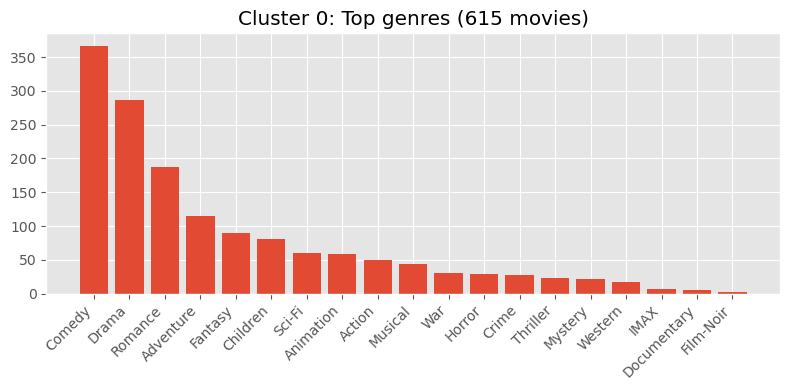


Cluster 1 (385 movies):


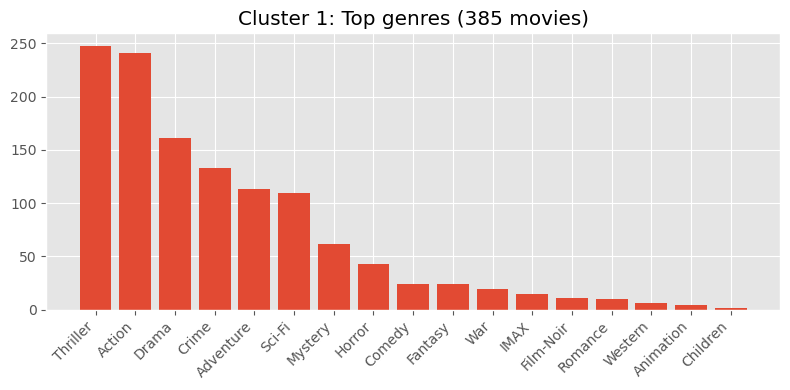

In [30]:
import matplotlib.pyplot as plt

# Run k-medoids clustering on the selected movie IDs with k=2
clusters, medoids = k_medoids(movie_ids, movie_genres, k=2)

# Iterate over each cluster and its member movie IDs
for i, mids in clusters.items():
    # Print cluster header with cluster index and number of movies
    print(f"\nCluster {i} ({len(mids)} movies):")
    
    # Accumulate genre frequencies for all movies in this cluster
    genre_count = {}
    for mid in mids:
        for g in movie_genres[mid]:
            genre_count[g] = genre_count.get(g, 0) + 1
    
    # Sort genres by descending frequency
    genres, counts = zip(*sorted(genre_count.items(), key=lambda x: -x[1]))
    
    # Create a bar chart of genre frequencies for this cluster
    plt.figure(figsize=(8,4))
    plt.bar(genres, counts)
    plt.title(f"Cluster {i}: Top genres ({len(mids)} movies)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    # DIsplay it
    plt.show()

### How do you intepret the two clusters?

=> We performed clustering on movies using the k-medoids algorithm with Jaccard distance based on their sets of genres.
The dataset was restricted to a curated subset of the most-rated movies (which is in `most-rated.pickle` file).
Clustering was applied using **k = 2**, and the algorithm was run multiple times to assess the consistency of the results despite **random initialization**.

Across multiple runs, the clusters consistently revealed thematic separations in the genre composition of the movies.

Cluster A (typically ~350–450 movies) :
Top genres include `Action`, `Thriller`, `Adventure`, `Sci-Fi`, and `Crime`.
This cluster groups **fast-paced**, genre-driven films often like blockbuster-style, high-adrenaline movies with strong emphasis on plot and tension.

Cluster B (typically ~550–650 movies) :
Top genres include `Drama`, `Comedy`, `Romance`, and occasionally `Fantasy` or `Musical`.
This cluster is dominated by narrative-heavy and **emotionally rich movies**, with a focus on character development, relationships, and thematic depth.

This confirms that even simple set-based representations of genre can uncover clear structure in movie datasets using appropriate clustering techniques.